# A very good introduction to pre-process steps:
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

## Import the required libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

## Separate Continues, Ordinal Descrete and Nominal Descrete in Train file

In [2]:
trainFile = 'house-prices-advanced-regression-techniques/train.csv'
trainDF = pd.read_csv(trainFile)

trainDF.drop(['Id'], axis=1, inplace=True)

descreteVars_Nominal = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                        'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
                        'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

descreteVars_Ordinal = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
                        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                        'KitchenQual','Functional',  'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                        'PavedDrive', 'PoolQC', 'Fence']

resultVar = ['SalePrice']

continuesVars = list(set(list(trainDF)) - set(descreteVars_Nominal) - set(descreteVars_Ordinal) - set(resultVar))

print('trainDF: ')
print(list(trainDF))
print('descreteVars_Nominal: ')
print(descreteVars_Nominal)
print('descreteVars_Ordinal: ')
print(descreteVars_Ordinal)
print('continuesVars: ')
print(continuesVars)

conDF = trainDF[continuesVars]
des_ord_DF = trainDF[descreteVars_Ordinal]
des_nom_DF = trainDF[descreteVars_Nominal]
resultCol = trainDF[resultVar]

trainDF: 
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Poo

## Map Ordinal Categorical data to Numerical

In [3]:
for var in des_ord_DF:
    print(var)
    print(des_ord_DF[var].unique())

LotShape
['Reg' 'IR1' 'IR2' 'IR3']
Utilities
['AllPub' 'NoSeWa']
LandSlope
['Gtl' 'Mod' 'Sev']
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC
['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual
['Gd' 'TA' 'Ex' 'Fa']
Functional
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish
['RFn' 'Unf' 'Fin' nan]
GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PavedDrive
['Y' 'N' 'P']
PoolQC
[nan 'Ex' 'Fa' 'Gd']
Fence
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


### Read Ordinal Categorical dictionary from file

In [4]:
import json 
fileName = 'cat_ord_dict.txt'
f = open(fileName,'r')
conversion_dict = json.loads(f.read())
print(conversion_dict)

{'LotShape': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}, 'Utilities': {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}, 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2}, 'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, 'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, 'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, 'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}, 'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, 'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, 'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, 'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, 'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}, 'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, 'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA

In [5]:
# des_ord_DF = des_ord_DF.map(conversion_dict)
# for var in des_ord_DF:
#     print(var)
#     print(des_ord_DF[var].unique())

cat_ord_DF_numerical = des_ord_DF.copy()
for feature in conversion_dict:
    print(feature)
    print(des_ord_DF[feature].unique())
    temp_conversion_dict = conversion_dict[feature]
    if ('NA' in temp_conversion_dict): # Replace 'NA' with np.nan
        temp_conversion_dict[np.nan] = temp_conversion_dict.pop('NA')
    print(temp_conversion_dict)
    cat_ord_DF_numerical[feature] = des_ord_DF[feature].map(temp_conversion_dict)
    print(cat_ord_DF_numerical[feature].unique())
    print('------------')



LotShape
['Reg' 'IR1' 'IR2' 'IR3']
{'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
[3 2 1 0]
------------
Utilities
['AllPub' 'NoSeWa']
{'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
[3 1]
------------
LandSlope
['Gtl' 'Mod' 'Sev']
{'Gtl': 0, 'Mod': 1, 'Sev': 2}
[0 1 2]
------------
ExterQual
['Gd' 'TA' 'Ex' 'Fa']
{'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
[3 2 4 1]
------------
ExterCond
['TA' 'Gd' 'Fa' 'Po' 'Ex']
{'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
[2 3 1 0 4]
------------
BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, nan: 0}
[4 3 5 0 2]
------------
BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, nan: 0}
[3 4 0 2 1]
------------
BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]
{'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, nan: 0}
[1 4 2 3 0]
------------
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, nan: 0}
[6 5 1 3 4 0 2]
------------
BsmtFinType2
['Unf' '

## Map Nominal Categorical data to Numerical

### Installing required libraries

In [13]:
# ! python -m pip install --upgrade pip
# ! pip install category_encoders

  Found existing installation: pip 19.2.1
    Uninstalling pip-19.2.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip-19.2.1.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [19]:
from sklearn.preprocessing import LabelBinarizer
import category_encoders as ce

cat_nom_DF = des_nom_DF.fillna('NULL').astype(str)
print(cat_nom_DF.shape)
cat_nom_list_numerical = []
for cat_nom_col_name in cat_nom_DF:
    temp_col = cat_nom_DF[cat_nom_col_name]
    ce_binary = ce.BinaryEncoder(cols=cat_nom_col_name)
    encoded = ce_binary.fit_transform(temp_col).drop([cat_nom_col_name+'_0'], axis=1)
    cat_nom_list_numerical.append(encoded)

cat_nom_DF_numerical = pd.concat(cat_nom_list_numerical, axis=1)
print(cat_nom_DF_numerical.head())


(1460, 24)
   MSSubClass_1  MSSubClass_2  MSSubClass_3  MSSubClass_4  MSZoning_1  \
0             0             0             0             1           0   
1             0             0             1             0           0   
2             0             0             0             1           0   
3             0             0             1             1           0   
4             0             0             0             1           0   

   MSZoning_2  MSZoning_3  Street_1  Alley_1  Alley_2  ...  MiscFeature_1  \
0           0           1         1        0        1  ...              0   
1           0           1         1        0        1  ...              0   
2           0           1         1        0        1  ...              0   
3           0           1         1        0        1  ...              0   
4           0           1         1        0        1  ...              0   

   MiscFeature_2  MiscFeature_3  SaleType_1  SaleType_2  SaleType_3  \
0              0

## Show columns distribution histogram

OverallQual
Max: 10
Min: 1
Delta: 9


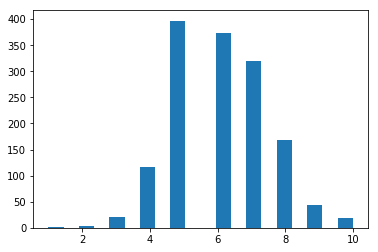

----------------------
GrLivArea
Max: 5642
Min: 334
Delta: 5308


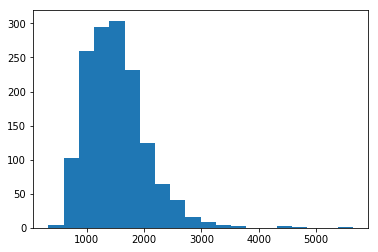

----------------------
BsmtUnfSF
Max: 2336
Min: 0
Delta: 2336


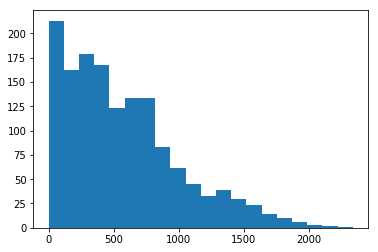

----------------------
HalfBath
Max: 2
Min: 0
Delta: 2


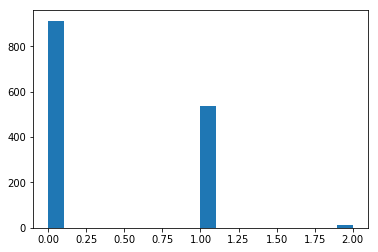

----------------------
YearBuilt
Max: 2010
Min: 1872
Delta: 138


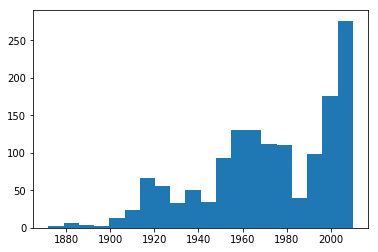

----------------------
MasVnrArea
Max: 1600.0
Min: 0.0
Delta: 1600.0


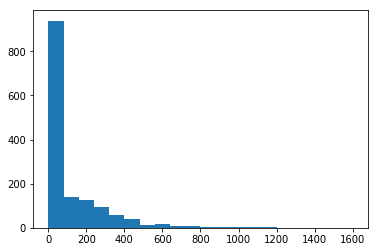

----------------------
GarageArea
Max: 1418
Min: 0
Delta: 1418


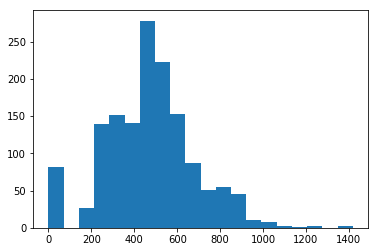

----------------------
LotArea
Max: 215245
Min: 1300
Delta: 213945


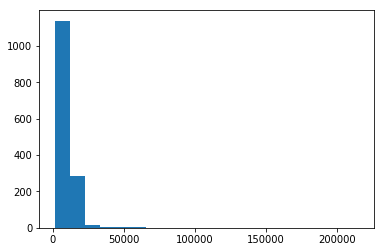

----------------------
YearRemodAdd
Max: 2010
Min: 1950
Delta: 60


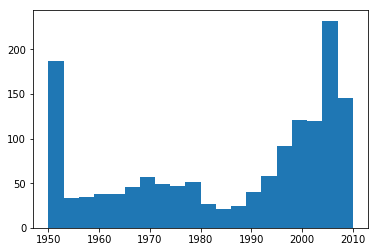

----------------------
EnclosedPorch
Max: 552
Min: 0
Delta: 552


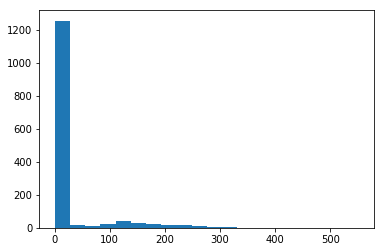

----------------------
MoSold
Max: 12
Min: 1
Delta: 11


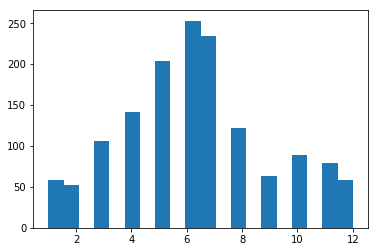

----------------------
3SsnPorch
Max: 508
Min: 0
Delta: 508


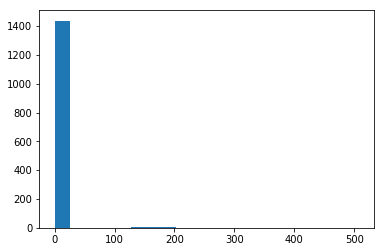

----------------------
PoolArea
Max: 738
Min: 0
Delta: 738


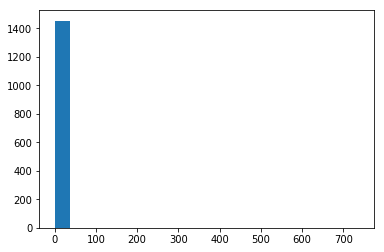

----------------------
Fireplaces
Max: 3
Min: 0
Delta: 3


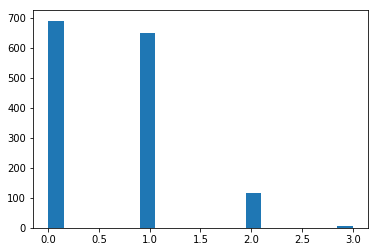

----------------------
GarageYrBlt
Max: 2010.0
Min: 1900.0
Delta: 110.0


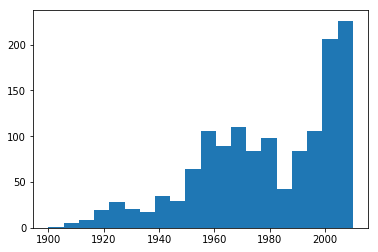

----------------------
BsmtFinSF1
Max: 5644
Min: 0
Delta: 5644


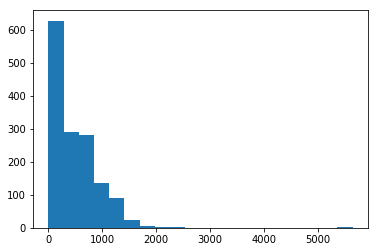

----------------------
MiscVal
Max: 15500
Min: 0
Delta: 15500


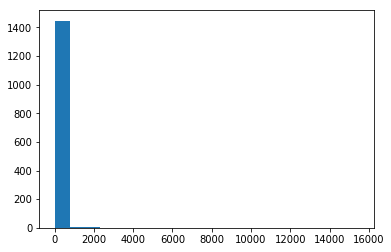

----------------------
OpenPorchSF
Max: 547
Min: 0
Delta: 547


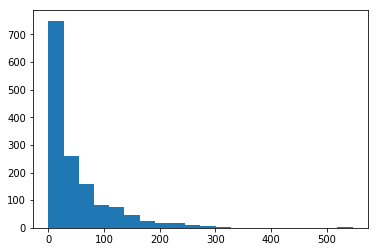

----------------------
YrSold
Max: 2010
Min: 2006
Delta: 4


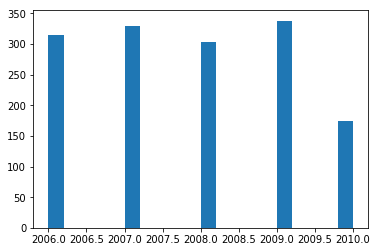

----------------------
OverallCond
Max: 9
Min: 1
Delta: 8


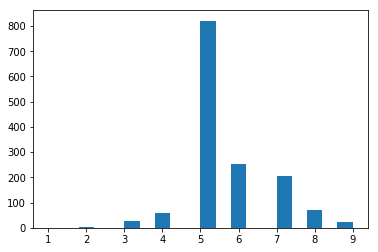

----------------------
FullBath
Max: 3
Min: 0
Delta: 3


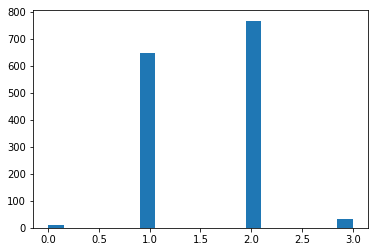

----------------------
BsmtFullBath
Max: 3
Min: 0
Delta: 3


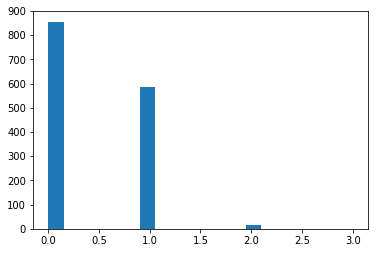

----------------------
TotalBsmtSF
Max: 6110
Min: 0
Delta: 6110


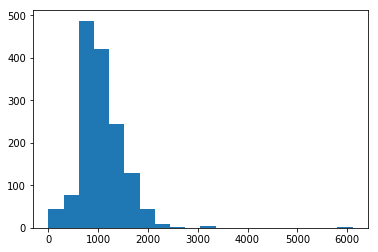

----------------------
BedroomAbvGr
Max: 8
Min: 0
Delta: 8


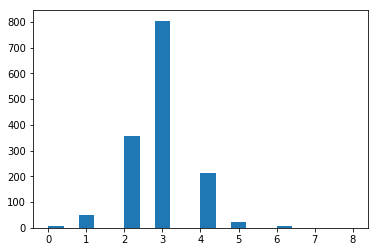

----------------------
LowQualFinSF
Max: 572
Min: 0
Delta: 572


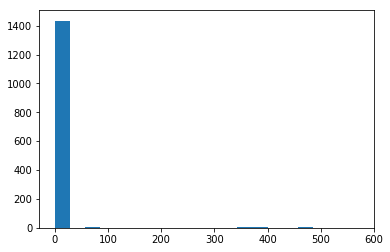

----------------------
BsmtHalfBath
Max: 2
Min: 0
Delta: 2


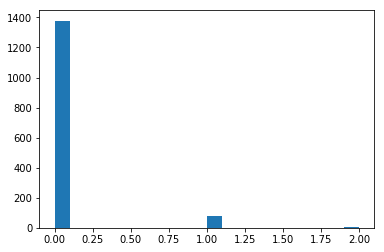

----------------------
BsmtFinSF2
Max: 1474
Min: 0
Delta: 1474


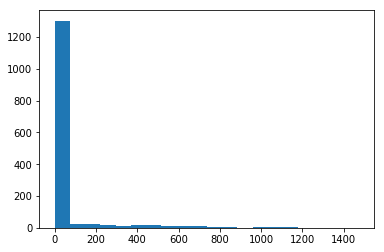

----------------------
WoodDeckSF
Max: 857
Min: 0
Delta: 857


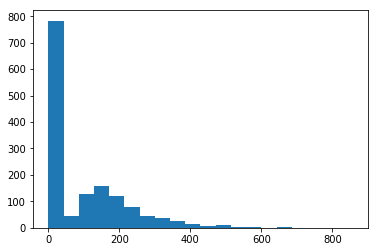

----------------------
2ndFlrSF
Max: 2065
Min: 0
Delta: 2065


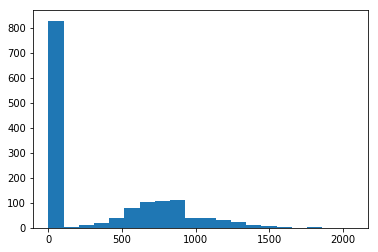

----------------------
ScreenPorch
Max: 480
Min: 0
Delta: 480


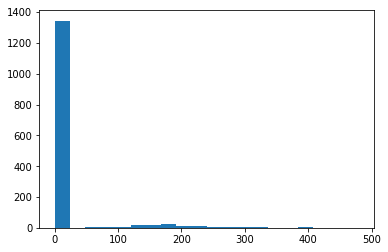

----------------------
GarageCars
Max: 4
Min: 0
Delta: 4


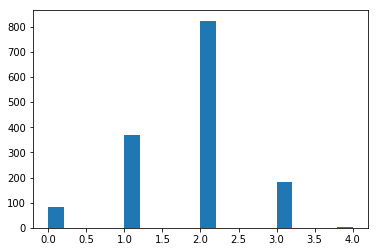

----------------------
KitchenAbvGr
Max: 3
Min: 0
Delta: 3


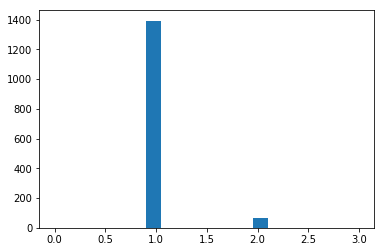

----------------------
TotRmsAbvGrd
Max: 14
Min: 2
Delta: 12


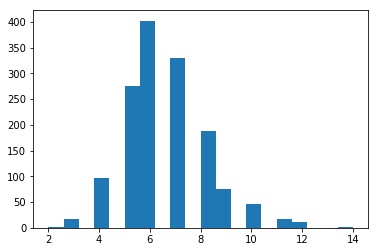

----------------------
1stFlrSF
Max: 4692
Min: 334
Delta: 4358


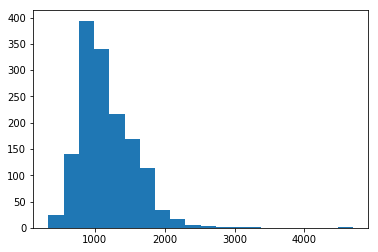

----------------------
LotFrontage
Max: 313.0
Min: 21.0
Delta: 292.0


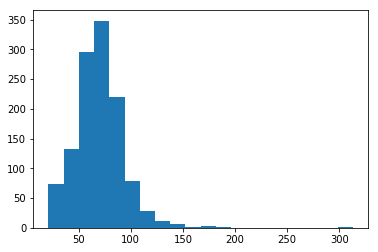

----------------------
LotShape
Max: 3
Min: 0
Delta: 3


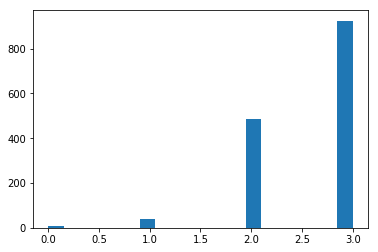

----------------------
Utilities
Max: 3
Min: 1
Delta: 2


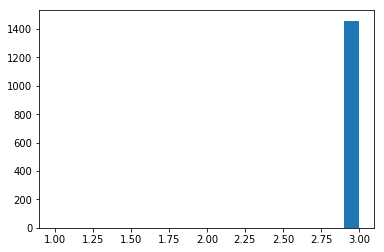

----------------------
LandSlope
Max: 2
Min: 0
Delta: 2


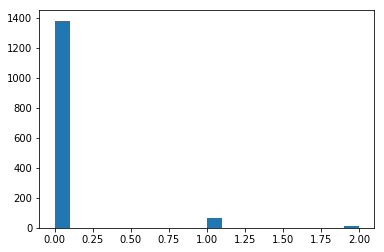

----------------------
ExterQual
Max: 4
Min: 1
Delta: 3


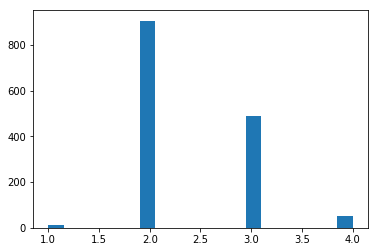

----------------------
ExterCond
Max: 4
Min: 0
Delta: 4


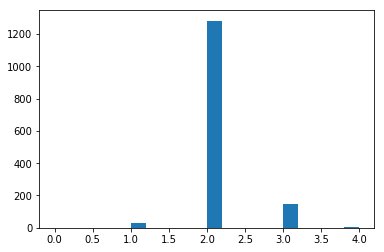

----------------------
BsmtQual
Max: 5
Min: 0
Delta: 5


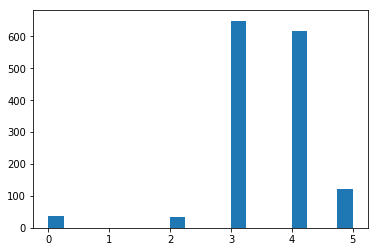

----------------------
BsmtCond
Max: 4
Min: 0
Delta: 4


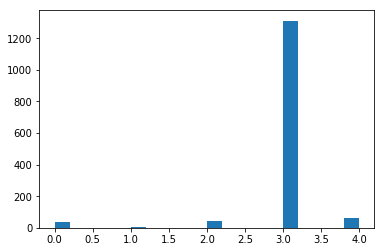

----------------------
BsmtExposure
Max: 4
Min: 0
Delta: 4


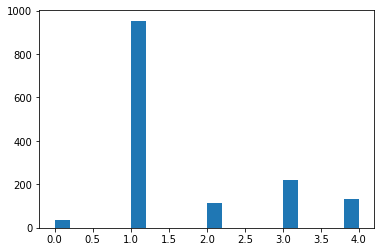

----------------------
BsmtFinType1
Max: 6
Min: 0
Delta: 6


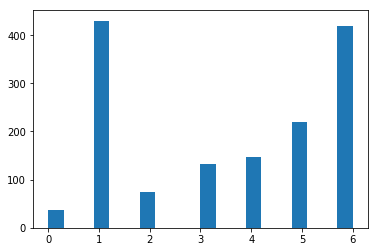

----------------------
BsmtFinType2
Max: 6
Min: 0
Delta: 6


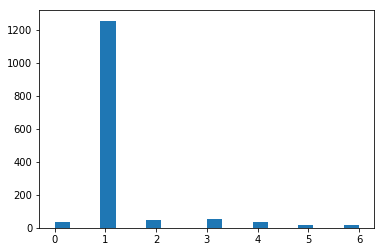

----------------------
HeatingQC
Max: 4
Min: 0
Delta: 4


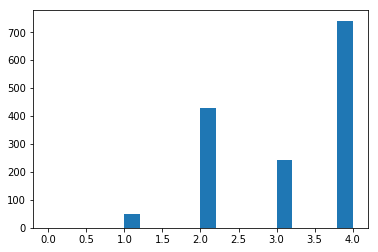

----------------------
KitchenQual
Max: 4
Min: 1
Delta: 3


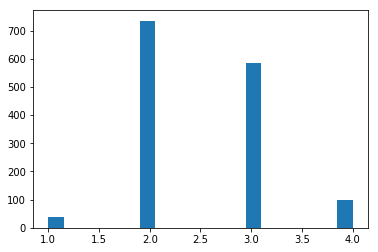

----------------------
Functional
Max: 7
Min: 1
Delta: 6


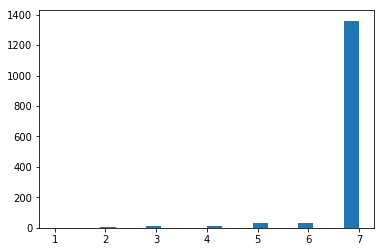

----------------------
FireplaceQu
Max: 5
Min: 0
Delta: 5


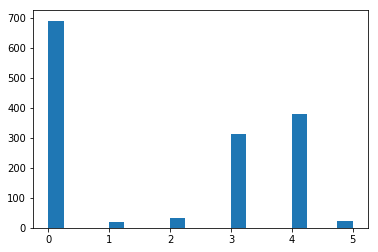

----------------------
GarageFinish
Max: 3
Min: 0
Delta: 3


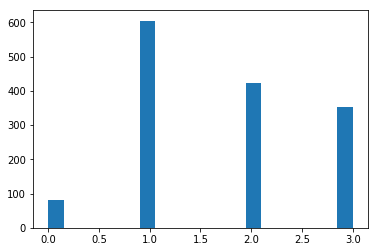

----------------------
GarageQual
Max: 5
Min: 0
Delta: 5


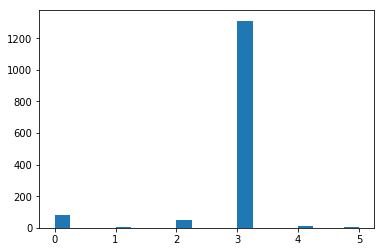

----------------------
GarageCond
Max: 5
Min: 0
Delta: 5


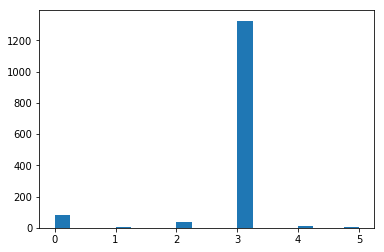

----------------------
PavedDrive
Max: 2
Min: 0
Delta: 2


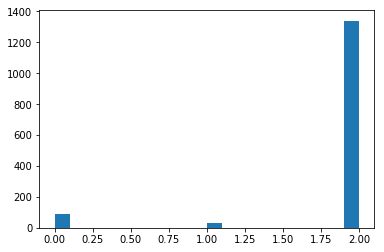

----------------------
PoolQC
Max: 4
Min: 0
Delta: 4


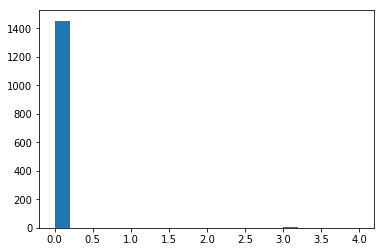

----------------------
Fence
Max: 4
Min: 0
Delta: 4


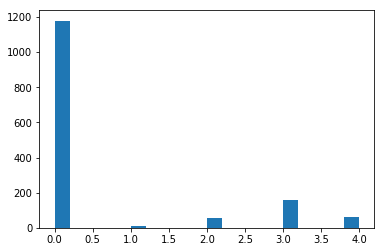

----------------------
MSSubClass_1
Max: 1
Min: 0
Delta: 1


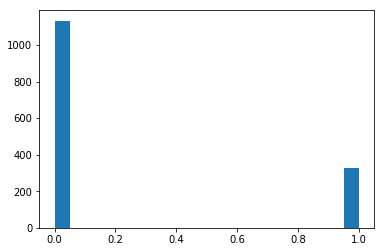

----------------------
MSSubClass_2
Max: 1
Min: 0
Delta: 1


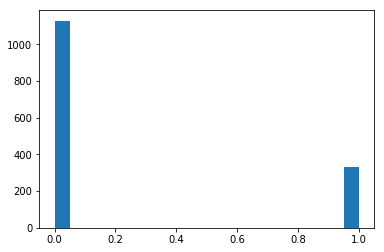

----------------------
MSSubClass_3
Max: 1
Min: 0
Delta: 1


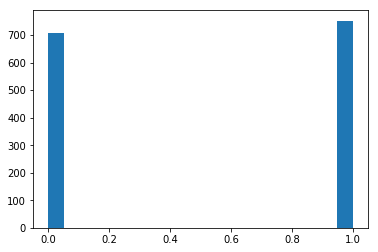

----------------------
MSSubClass_4
Max: 1
Min: 0
Delta: 1


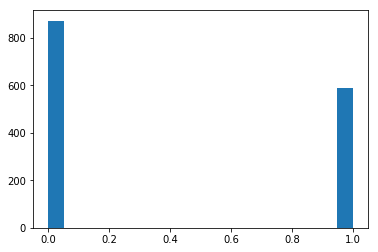

----------------------
MSZoning_1
Max: 1
Min: 0
Delta: 1


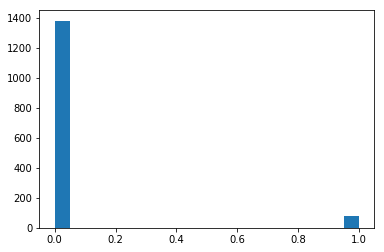

----------------------
MSZoning_2
Max: 1
Min: 0
Delta: 1


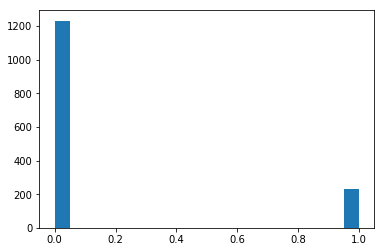

----------------------
MSZoning_3
Max: 1
Min: 0
Delta: 1


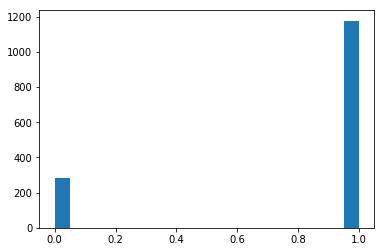

----------------------
Street_1
Max: 1
Min: 0
Delta: 1


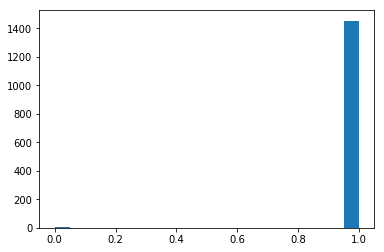

----------------------
Alley_1
Max: 1
Min: 0
Delta: 1


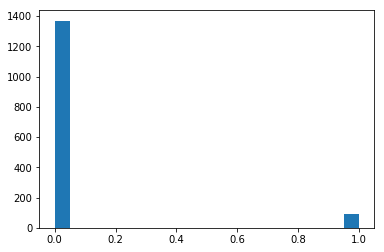

----------------------
Alley_2
Max: 1
Min: 0
Delta: 1


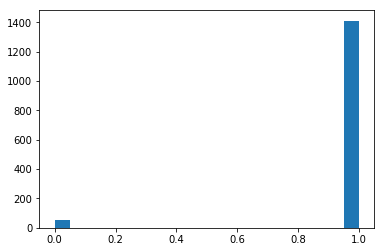

----------------------
LandContour_1
Max: 1
Min: 0
Delta: 1


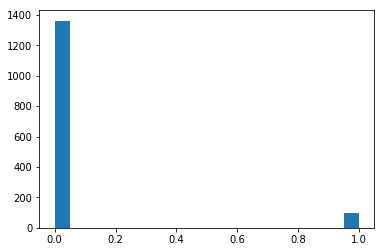

----------------------
LandContour_2
Max: 1
Min: 0
Delta: 1


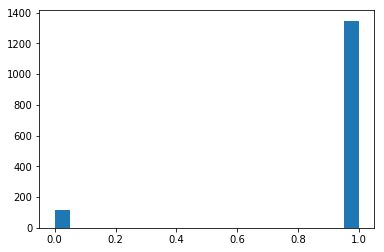

----------------------
LotConfig_1
Max: 1
Min: 0
Delta: 1


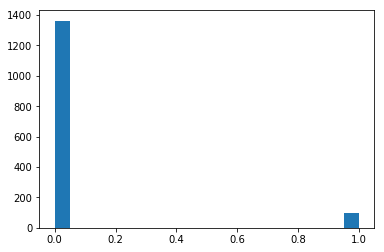

----------------------
LotConfig_2
Max: 1
Min: 0
Delta: 1


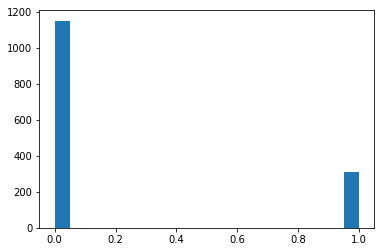

----------------------
LotConfig_3
Max: 1
Min: 0
Delta: 1


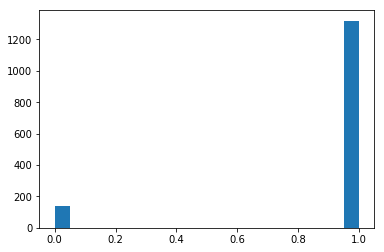

----------------------
Neighborhood_1
Max: 1
Min: 0
Delta: 1


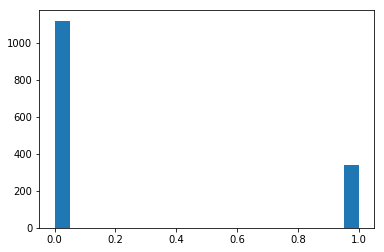

----------------------
Neighborhood_2
Max: 1
Min: 0
Delta: 1


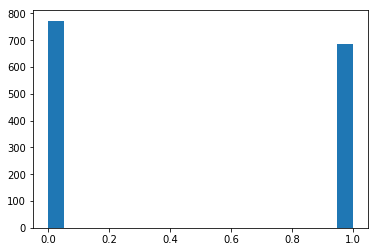

----------------------
Neighborhood_3
Max: 1
Min: 0
Delta: 1


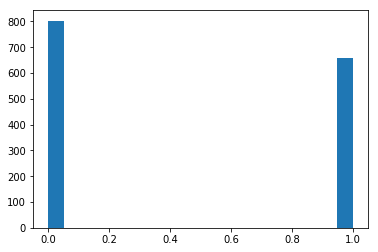

----------------------
Neighborhood_4
Max: 1
Min: 0
Delta: 1


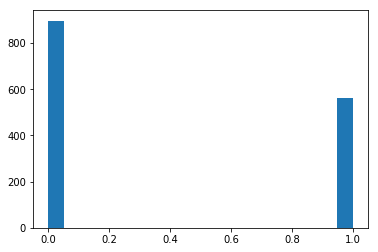

----------------------
Neighborhood_5
Max: 1
Min: 0
Delta: 1


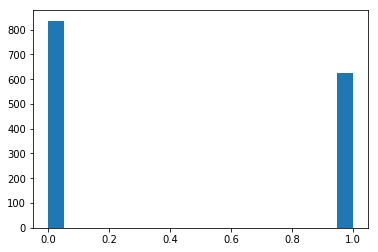

----------------------
Condition1_1
Max: 1
Min: 0
Delta: 1


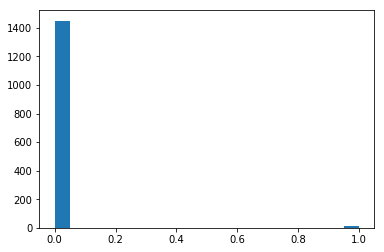

----------------------
Condition1_2
Max: 1
Min: 0
Delta: 1


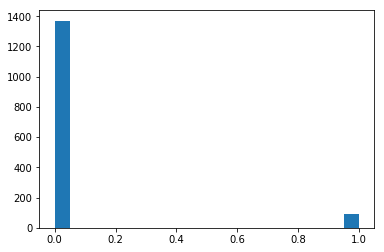

----------------------
Condition1_3
Max: 1
Min: 0
Delta: 1


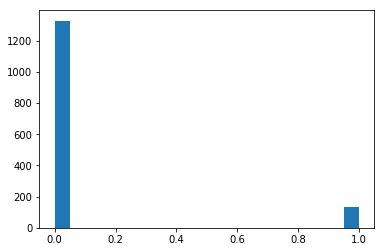

----------------------
Condition1_4
Max: 1
Min: 0
Delta: 1


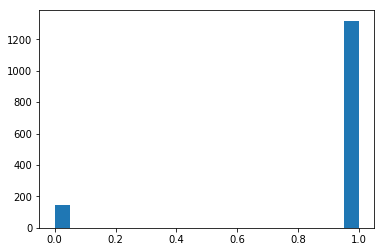

----------------------
Condition2_1
Max: 1
Min: 0
Delta: 1


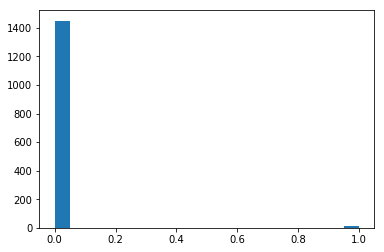

----------------------
Condition2_2
Max: 1
Min: 0
Delta: 1


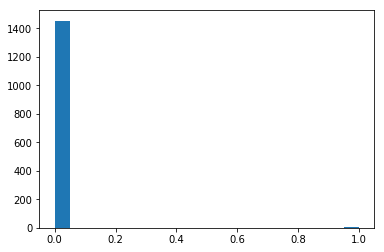

----------------------
Condition2_3
Max: 1
Min: 0
Delta: 1


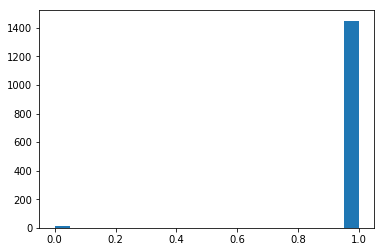

----------------------
BldgType_1
Max: 1
Min: 0
Delta: 1


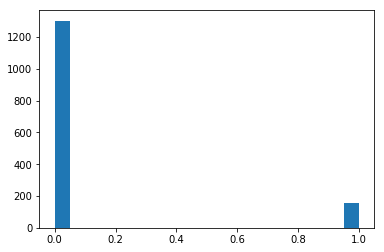

----------------------
BldgType_2
Max: 1
Min: 0
Delta: 1


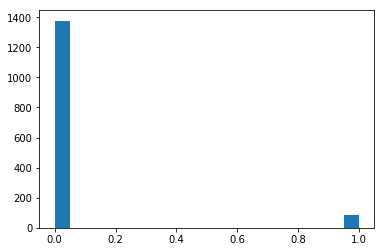

----------------------
BldgType_3
Max: 1
Min: 0
Delta: 1


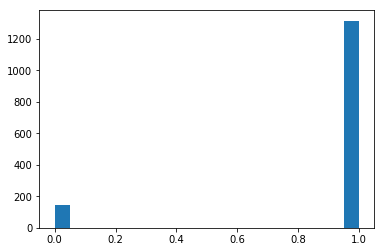

----------------------
HouseStyle_1
Max: 1
Min: 0
Delta: 1


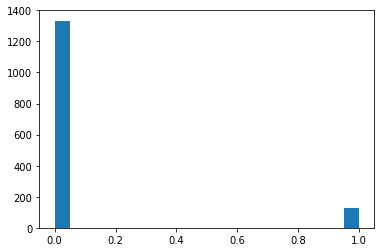

----------------------
HouseStyle_2
Max: 1
Min: 0
Delta: 1


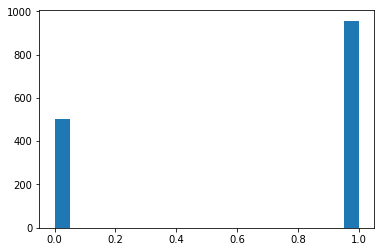

----------------------
HouseStyle_3
Max: 1
Min: 0
Delta: 1


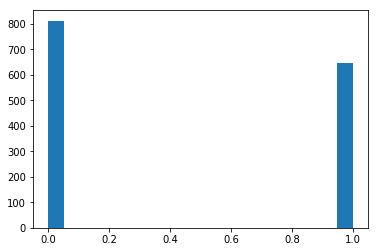

----------------------
RoofStyle_1
Max: 1
Min: 0
Delta: 1


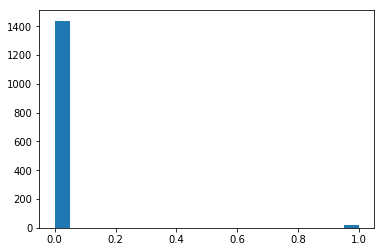

----------------------
RoofStyle_2
Max: 1
Min: 0
Delta: 1


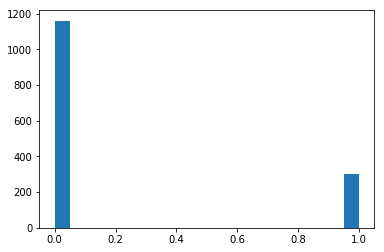

----------------------
RoofStyle_3
Max: 1
Min: 0
Delta: 1


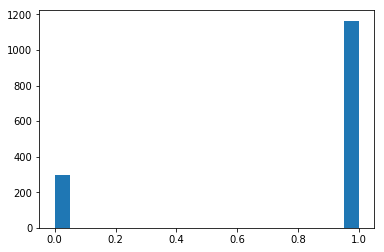

----------------------
RoofMatl_1
Max: 1
Min: 0
Delta: 1


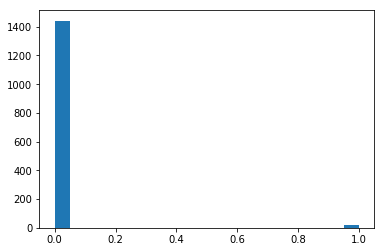

----------------------
RoofMatl_2
Max: 1
Min: 0
Delta: 1


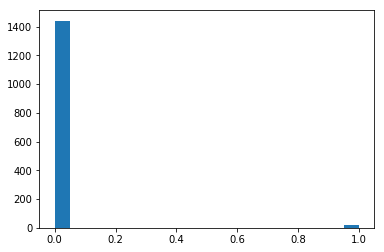

----------------------
RoofMatl_3
Max: 1
Min: 0
Delta: 1


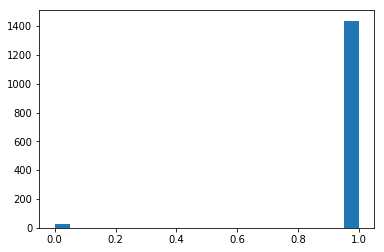

----------------------
Exterior1st_1
Max: 1
Min: 0
Delta: 1


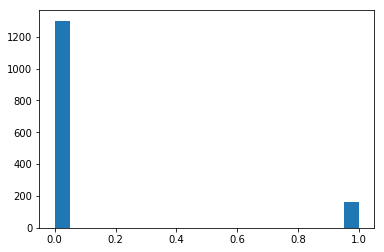

----------------------
Exterior1st_2
Max: 1
Min: 0
Delta: 1


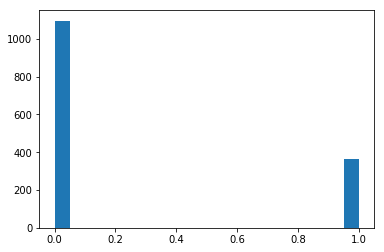

----------------------
Exterior1st_3
Max: 1
Min: 0
Delta: 1


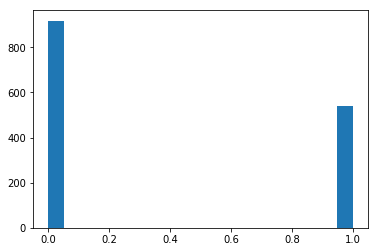

----------------------
Exterior1st_4
Max: 1
Min: 0
Delta: 1


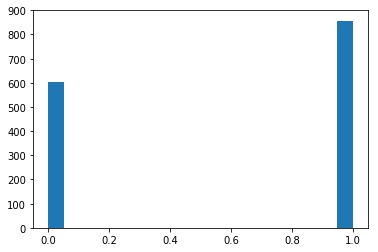

----------------------
Exterior2nd_1
Max: 1
Min: 0
Delta: 1


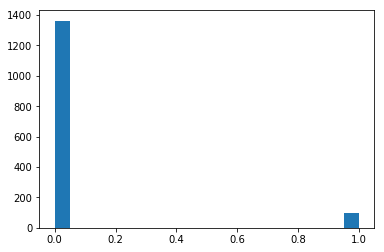

----------------------
Exterior2nd_2
Max: 1
Min: 0
Delta: 1


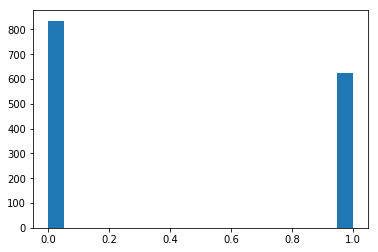

----------------------
Exterior2nd_3
Max: 1
Min: 0
Delta: 1


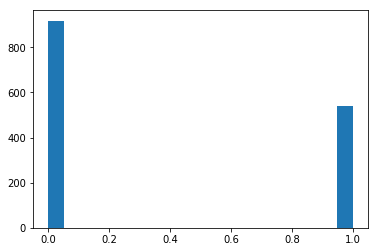

----------------------
Exterior2nd_4
Max: 1
Min: 0
Delta: 1


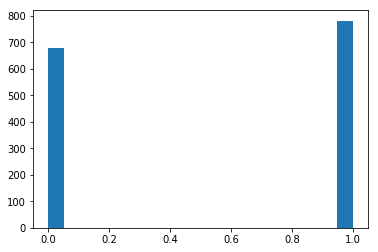

----------------------
MasVnrType_1
Max: 1
Min: 0
Delta: 1


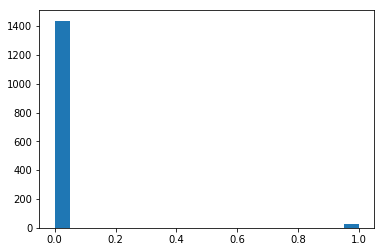

----------------------
MasVnrType_2
Max: 1
Min: 0
Delta: 1


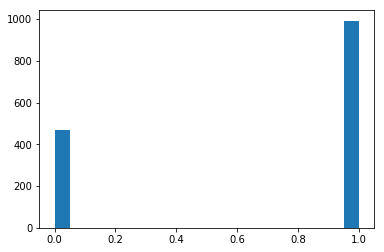

----------------------
MasVnrType_3
Max: 1
Min: 0
Delta: 1


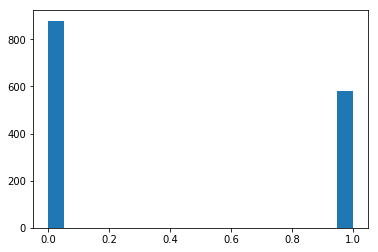

----------------------
Foundation_1
Max: 1
Min: 0
Delta: 1


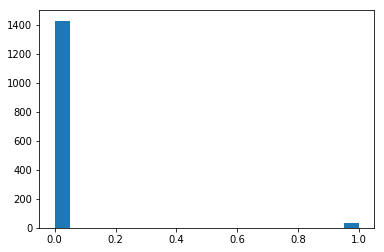

----------------------
Foundation_2
Max: 1
Min: 0
Delta: 1


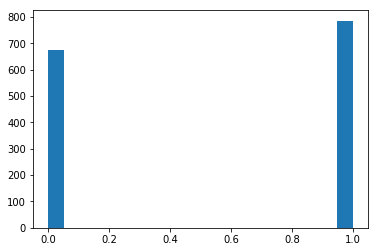

----------------------
Foundation_3
Max: 1
Min: 0
Delta: 1


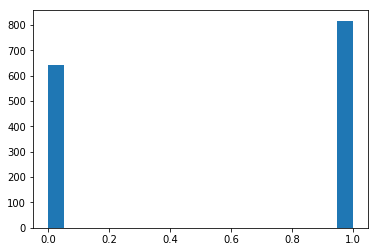

----------------------
Heating_1
Max: 1
Min: 0
Delta: 1


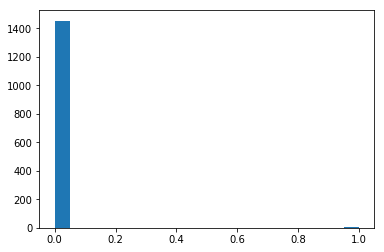

----------------------
Heating_2
Max: 1
Min: 0
Delta: 1


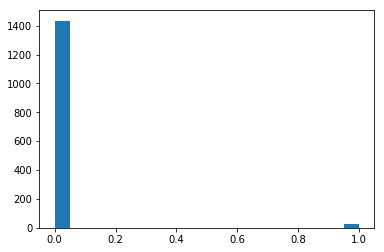

----------------------
Heating_3
Max: 1
Min: 0
Delta: 1


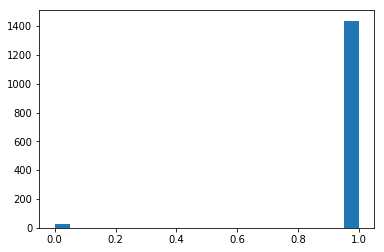

----------------------
CentralAir_1
Max: 1
Min: 0
Delta: 1


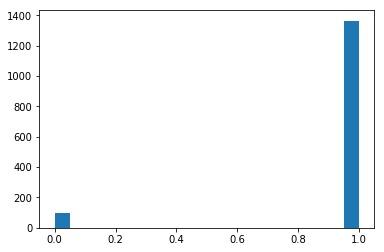

----------------------
Electrical_1
Max: 1
Min: 0
Delta: 1


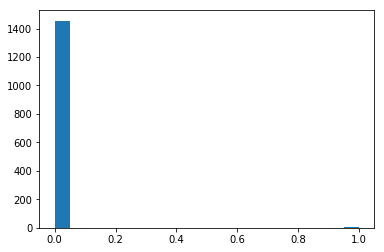

----------------------
Electrical_2
Max: 1
Min: 0
Delta: 1


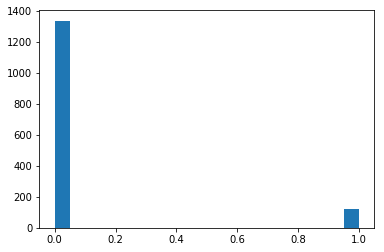

----------------------
Electrical_3
Max: 1
Min: 0
Delta: 1


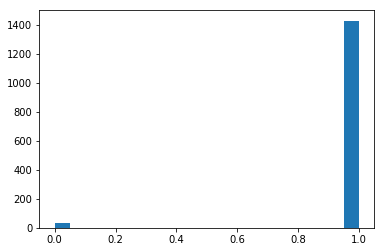

----------------------
GarageType_1
Max: 1
Min: 0
Delta: 1


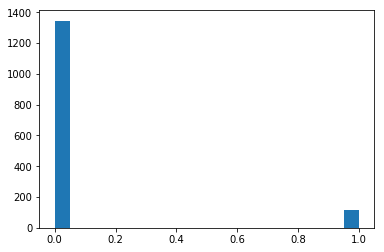

----------------------
GarageType_2
Max: 1
Min: 0
Delta: 1


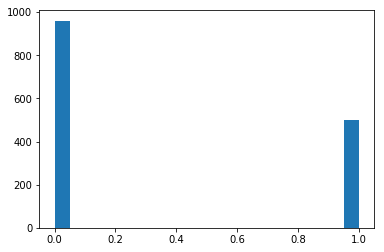

----------------------
GarageType_3
Max: 1
Min: 0
Delta: 1


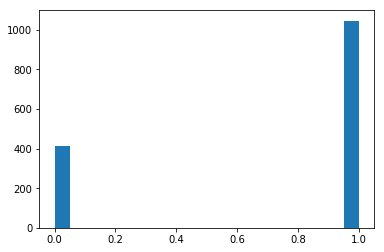

----------------------
MiscFeature_1
Max: 1
Min: 0
Delta: 1


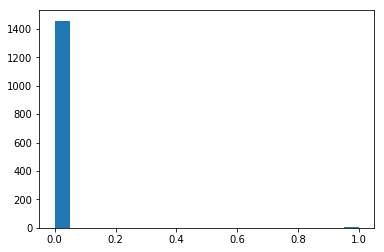

----------------------
MiscFeature_2
Max: 1
Min: 0
Delta: 1


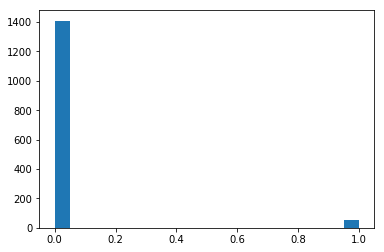

----------------------
MiscFeature_3
Max: 1
Min: 0
Delta: 1


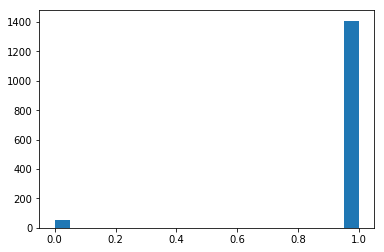

----------------------
SaleType_1
Max: 1
Min: 0
Delta: 1


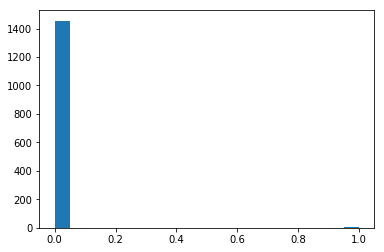

----------------------
SaleType_2
Max: 1
Min: 0
Delta: 1


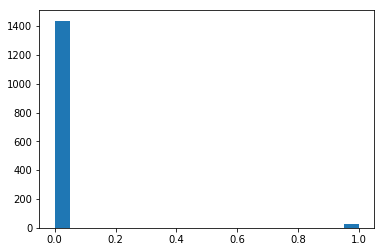

----------------------
SaleType_3
Max: 1
Min: 0
Delta: 1


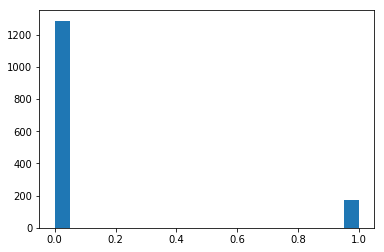

----------------------
SaleType_4
Max: 1
Min: 0
Delta: 1


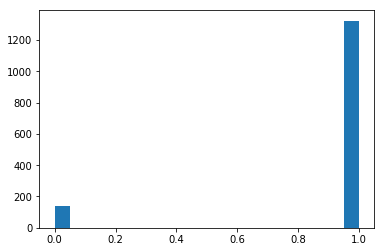

----------------------
SaleCondition_1
Max: 1
Min: 0
Delta: 1


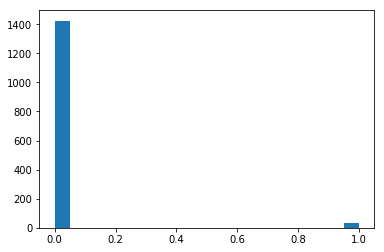

----------------------
SaleCondition_2
Max: 1
Min: 0
Delta: 1


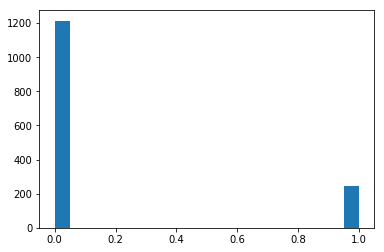

----------------------
SaleCondition_3
Max: 1
Min: 0
Delta: 1


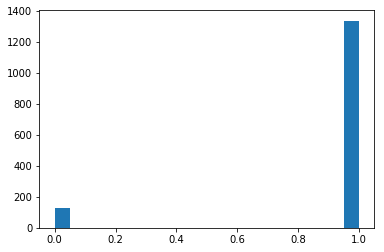

----------------------


In [20]:
colIndex=0
binwidth = 5

conDF = pd.concat([conDF, cat_ord_DF_numerical, cat_nom_DF_numerical], axis=1)
listOFContinuesCols = list(conDF)

nrows = len(listOFContinuesCols)
ncols = 1

for continuesCol in conDF:
    print(continuesCol)
    tempCol = conDF[continuesCol].dropna()
    colMax = tempCol.max()
    colMin = tempCol.min()
    colDelta = colMax - colMin
    print('Max: ' + str(colMax))
    print('Min: ' + str(colMin))
    print('Delta: ' + str(colDelta))
    
    
    plt.hist(tempCol, bins=20)
    
    plt.show()
    print('----------------------')

## Analysing 'SalePrice'


In [21]:
#descriptive statistics summary
resultCol.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


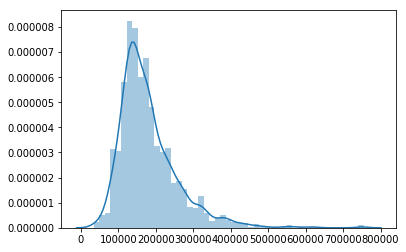

In [22]:
import seaborn as sns
#histogram
sns.distplot(resultCol);

In [23]:
#skewness and kurtosis
print("Skewness: %f" % resultCol.skew())
print("Kurtosis: %f" % resultCol.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Relationship with numerical variables

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


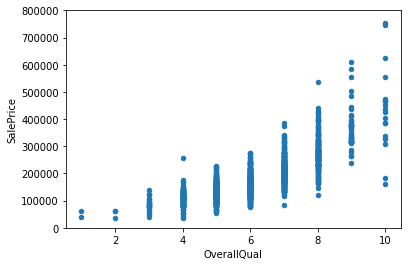

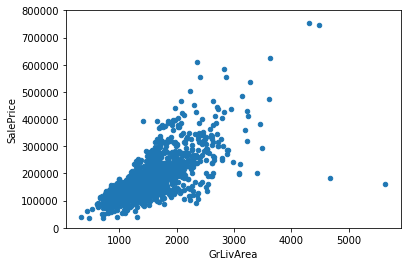

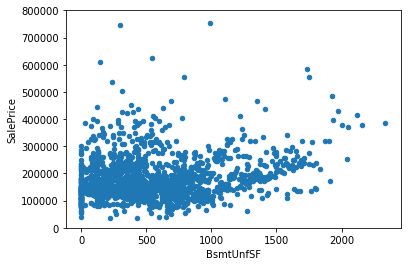

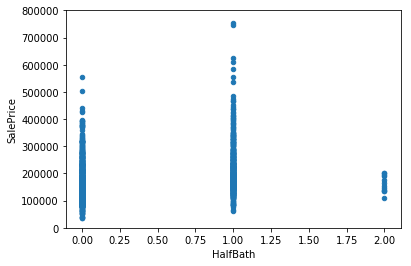

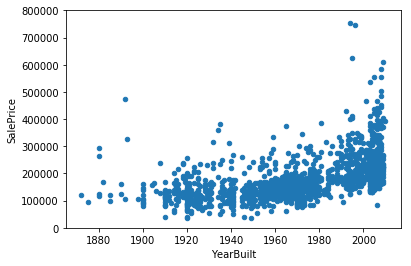

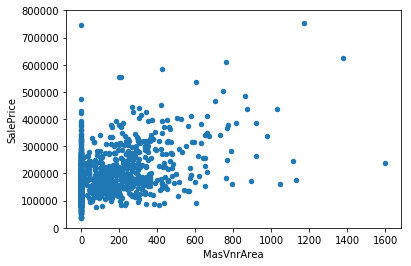

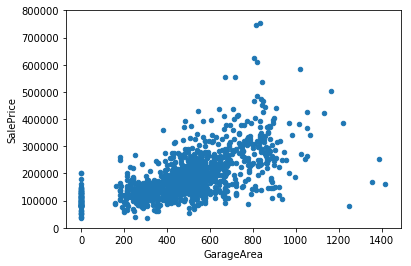

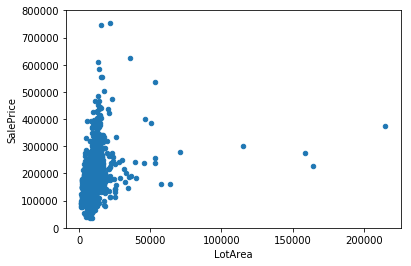

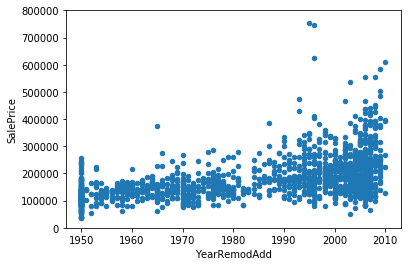

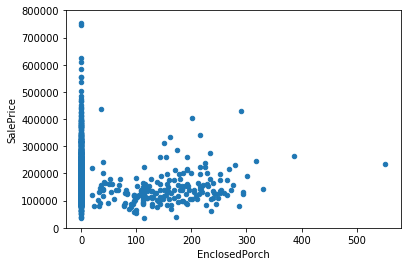

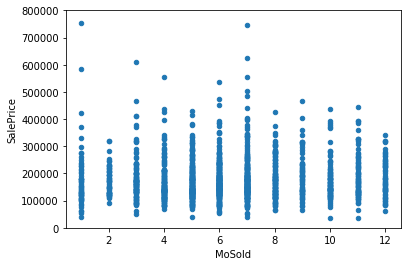

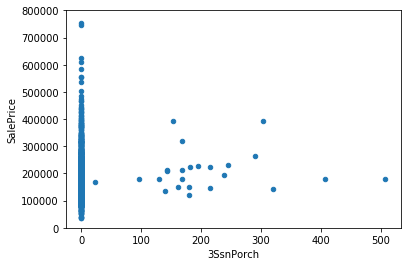

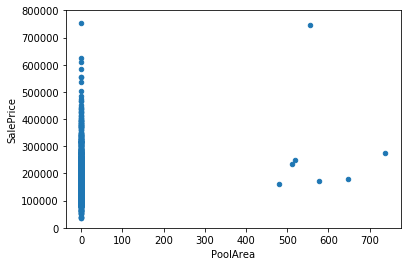

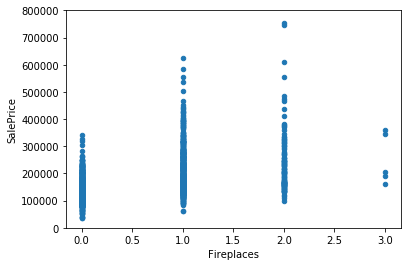

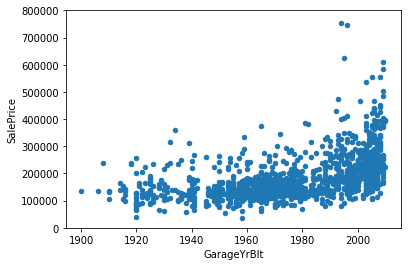

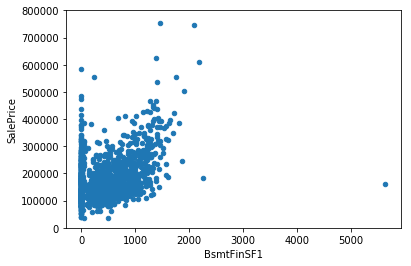

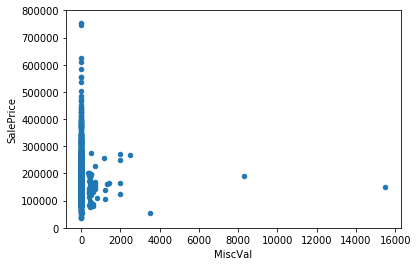

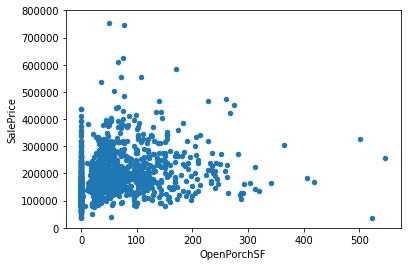

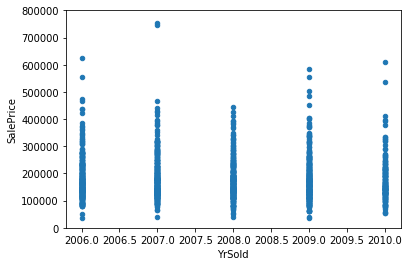

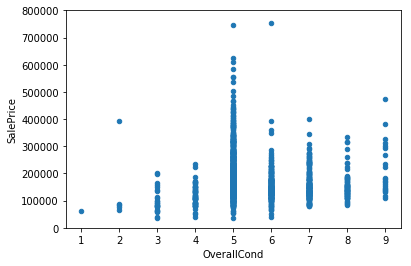

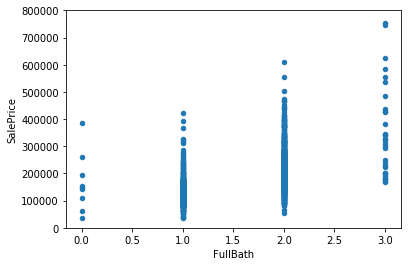

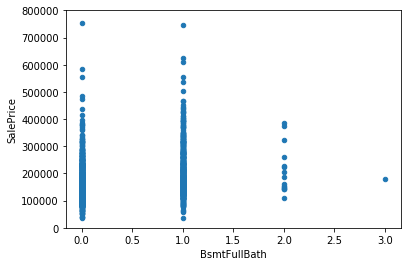

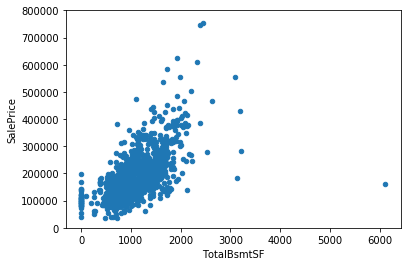

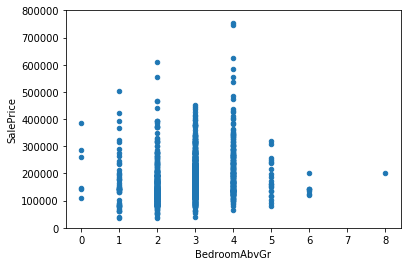

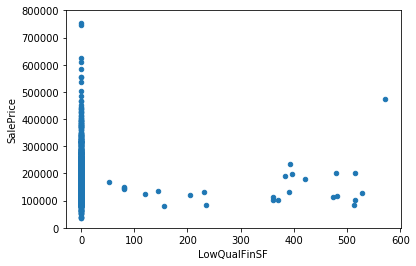

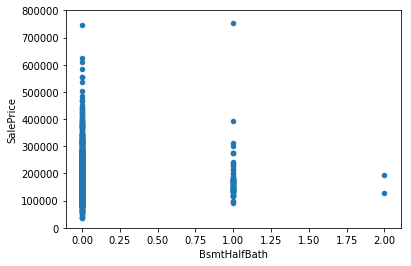

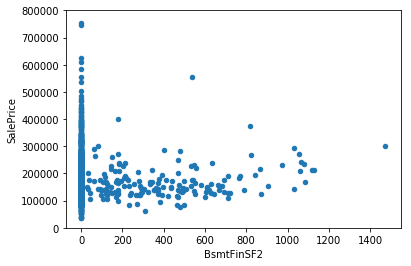

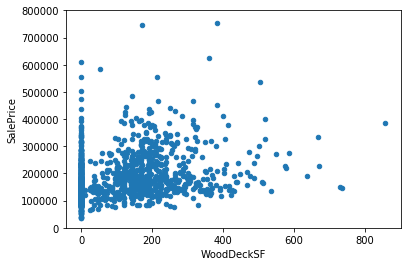

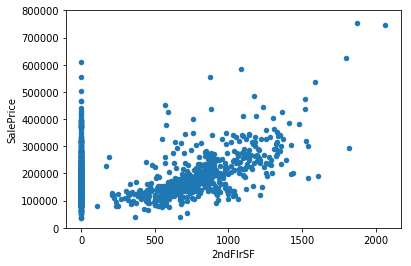

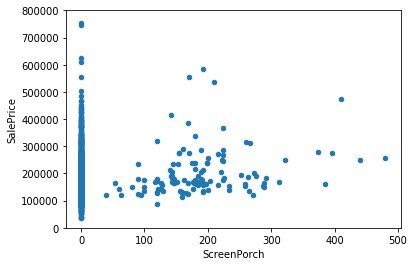

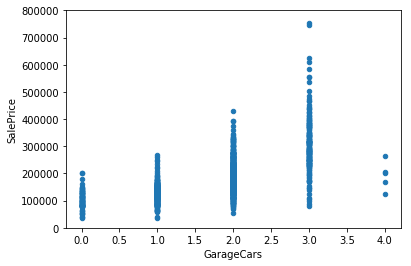

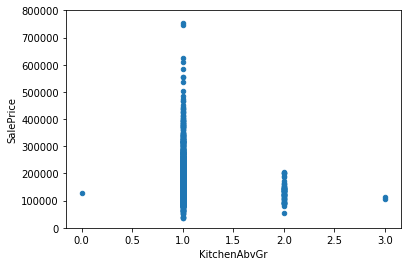

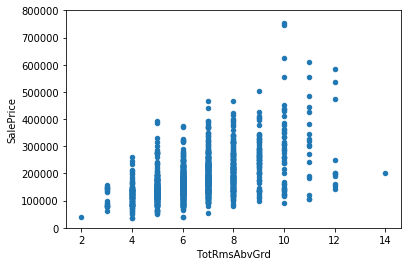

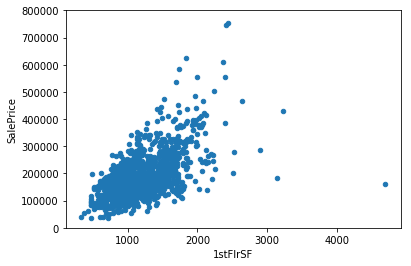

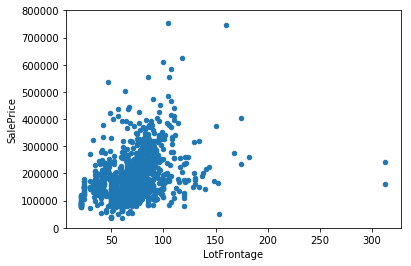

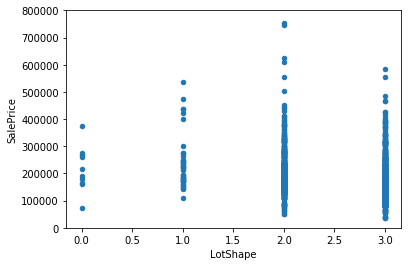

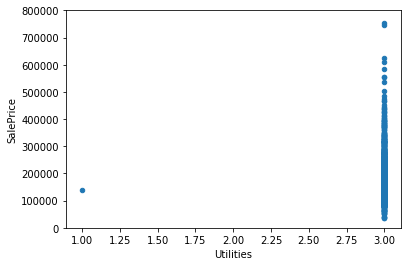

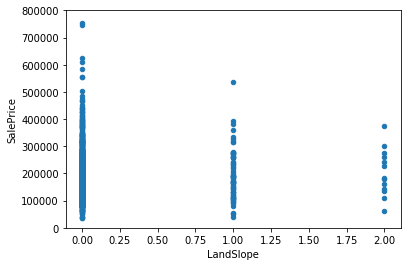

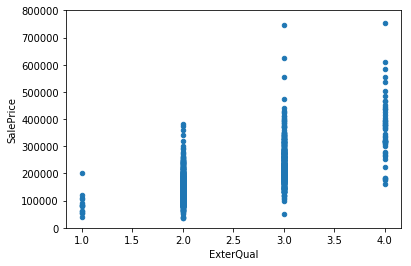

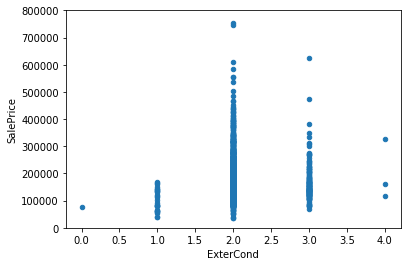

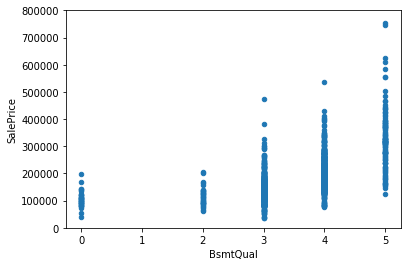

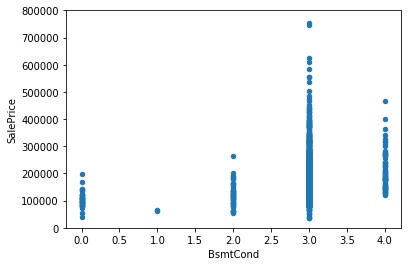

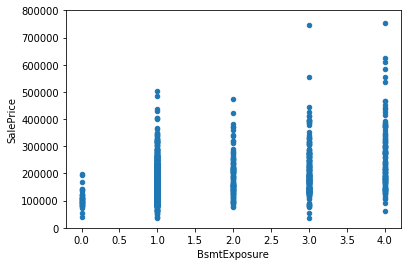

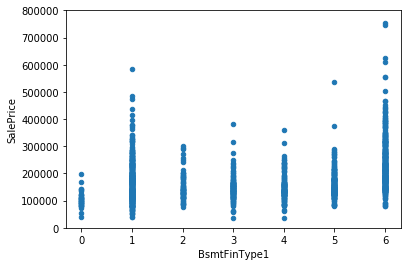

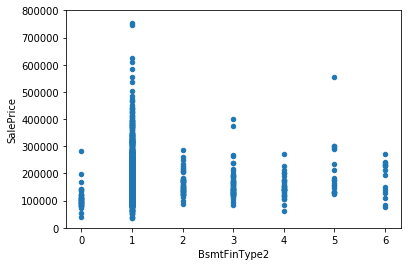

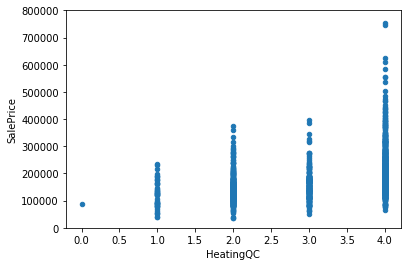

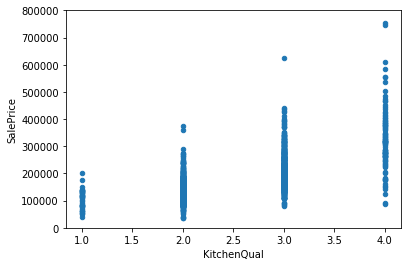

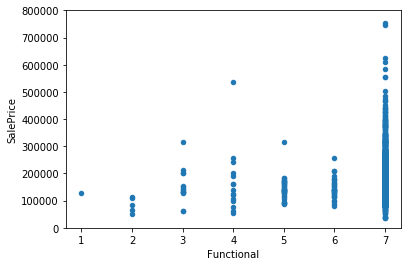

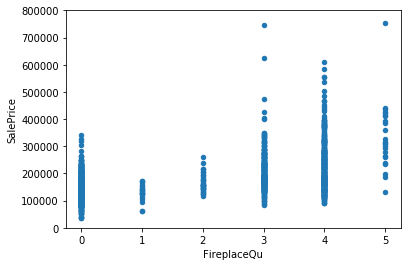

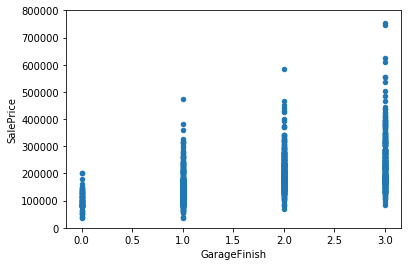

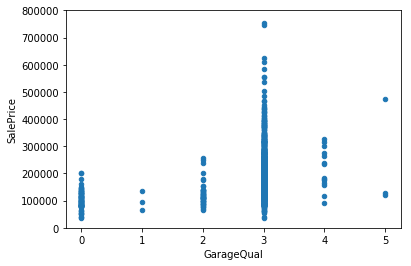

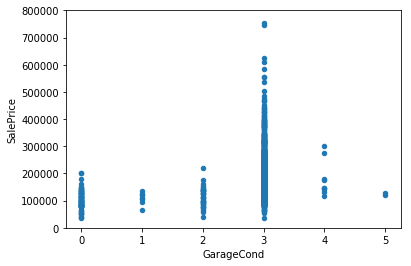

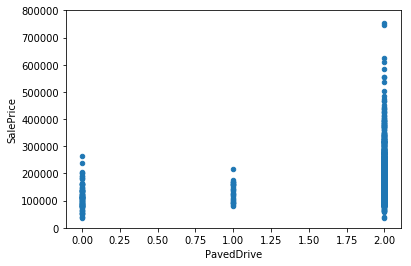

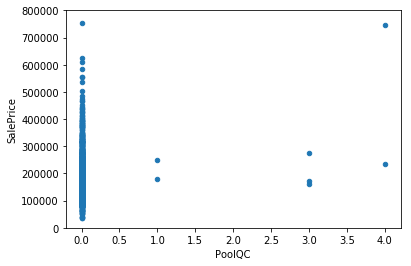

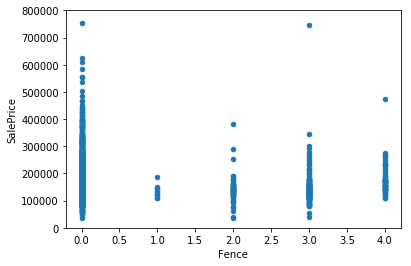

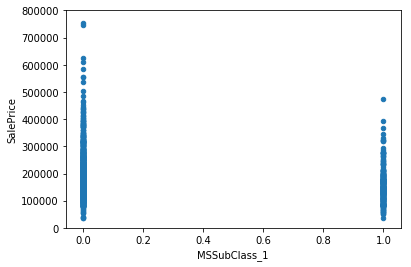

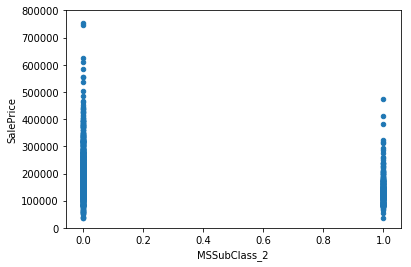

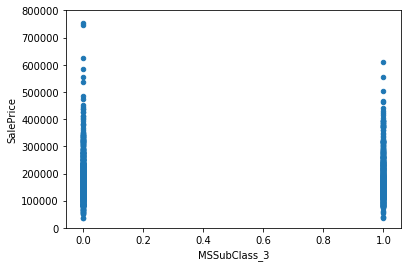

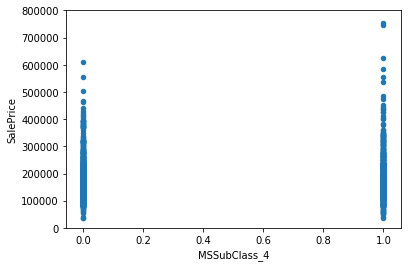

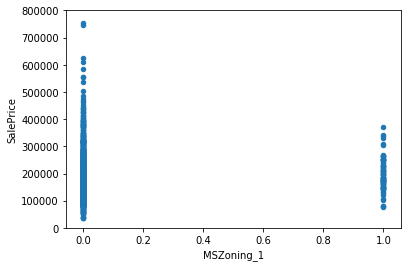

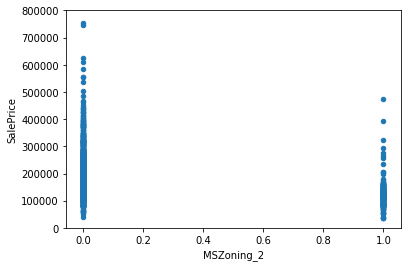

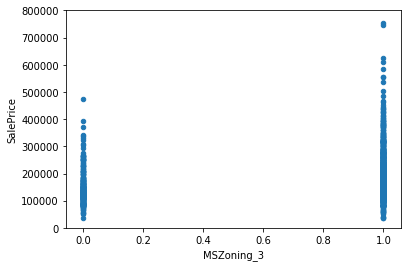

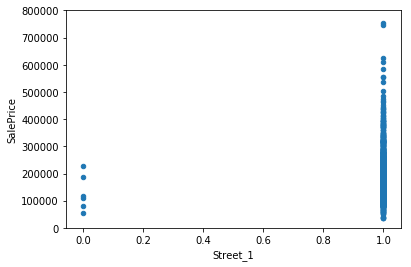

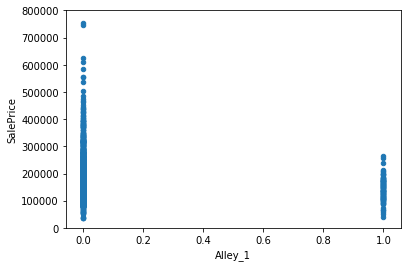

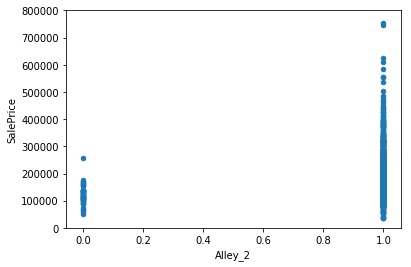

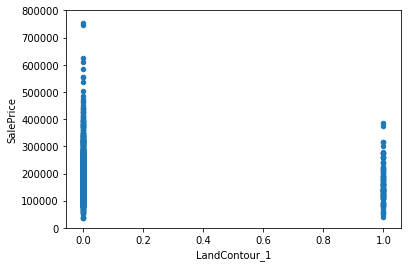

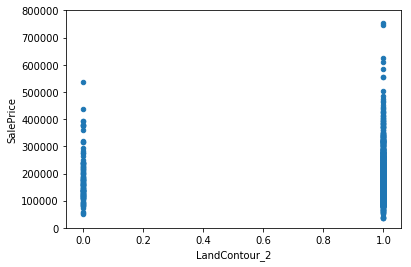

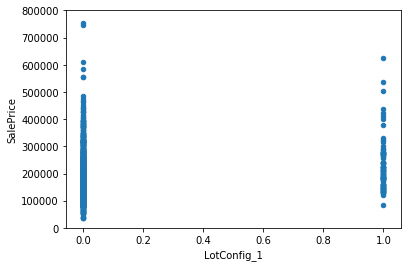

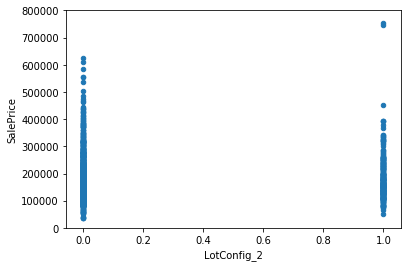

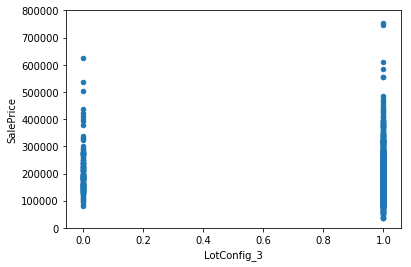

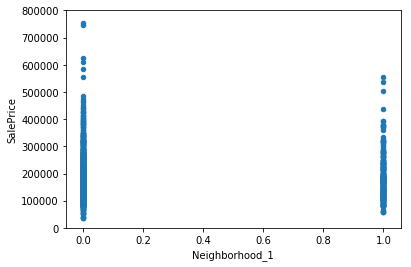

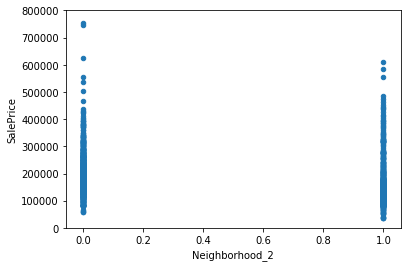

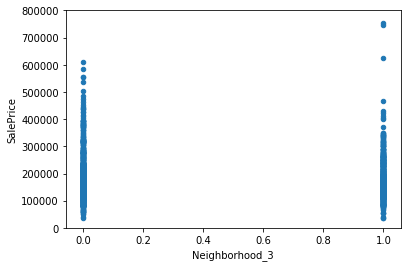

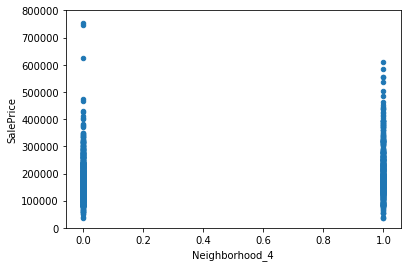

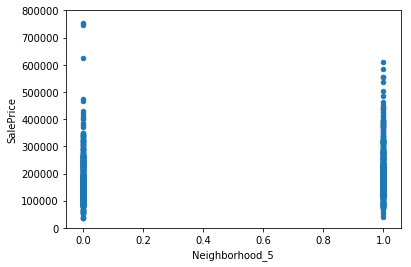

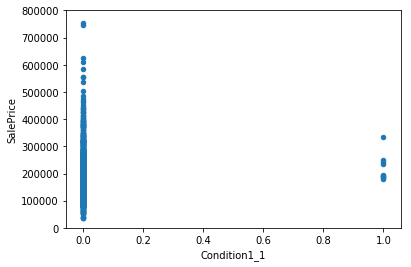

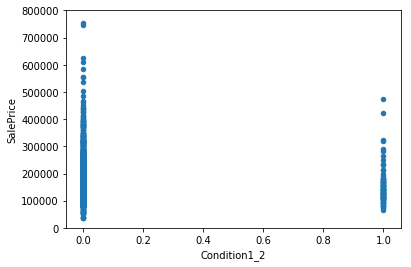

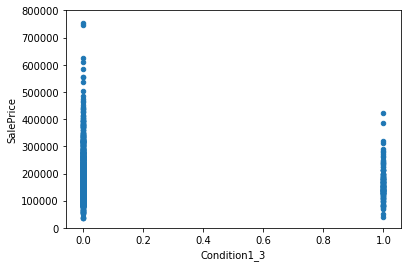

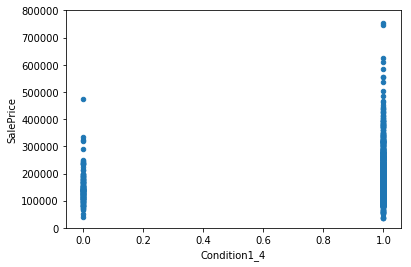

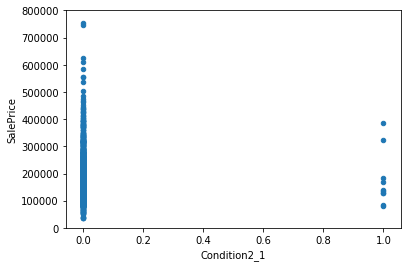

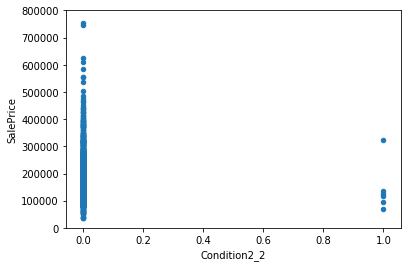

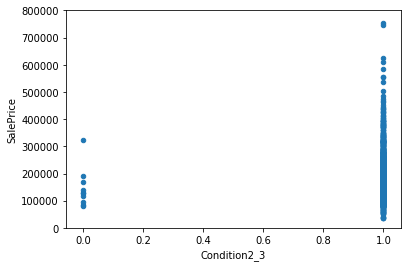

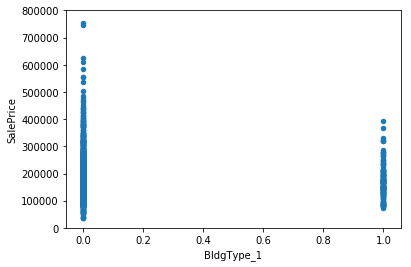

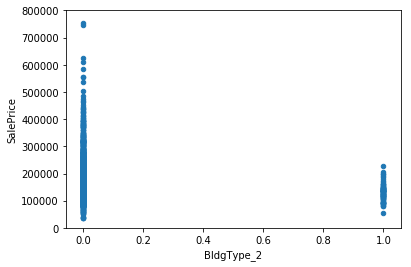

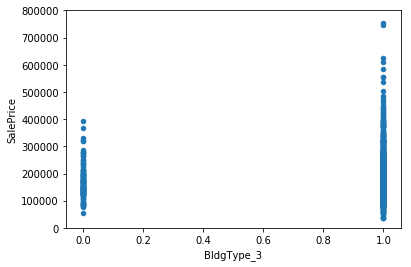

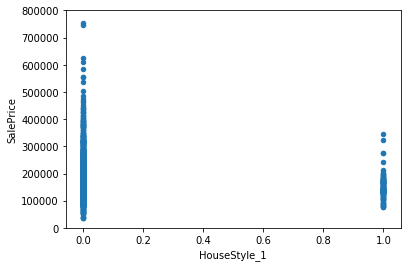

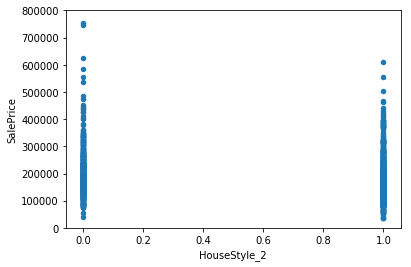

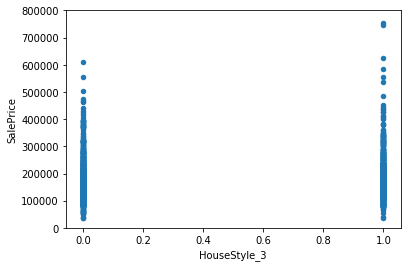

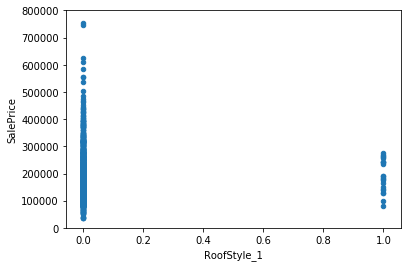

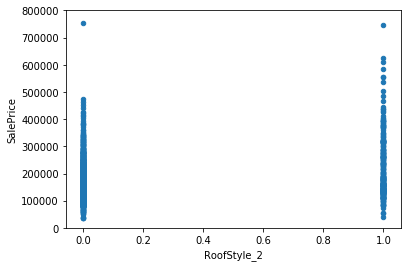

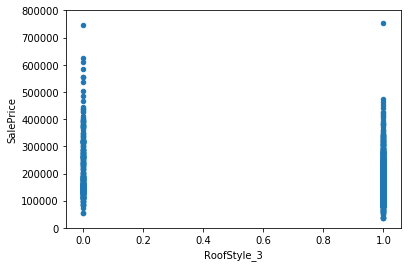

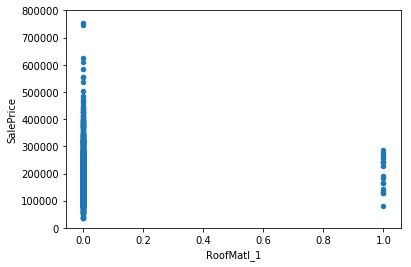

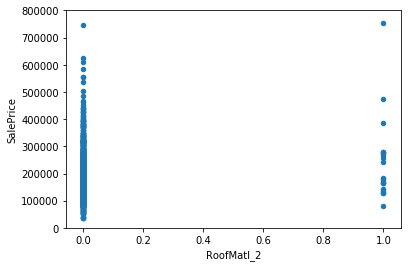

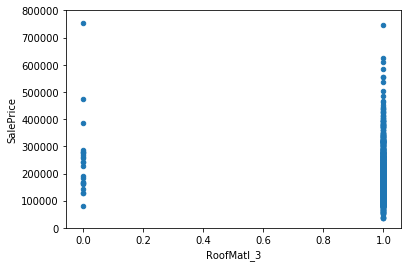

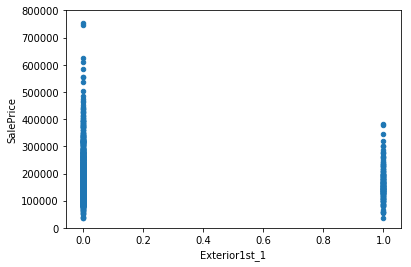

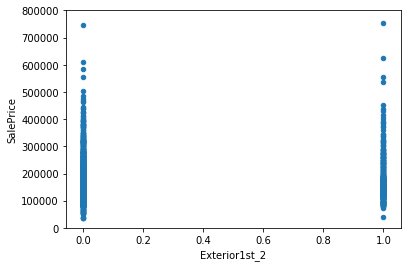

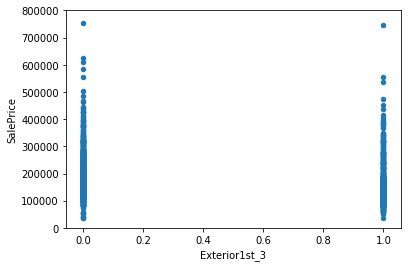

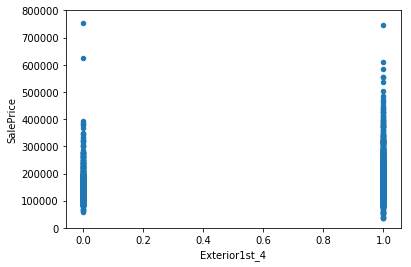

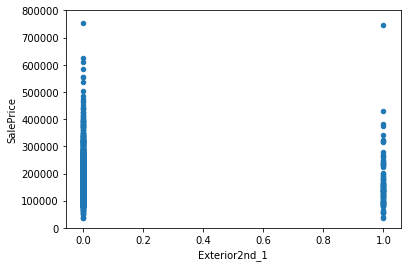

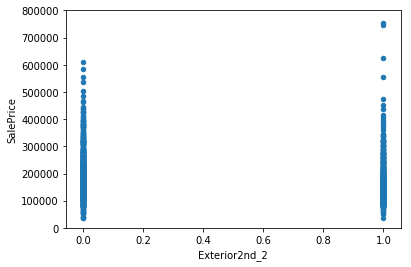

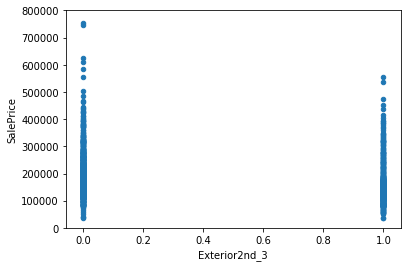

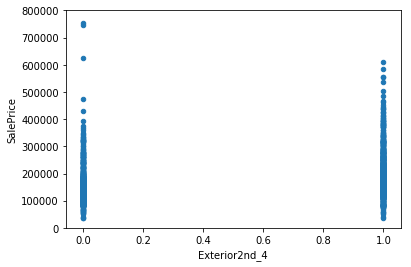

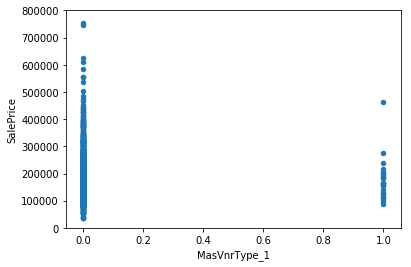

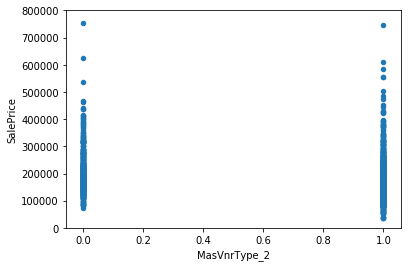

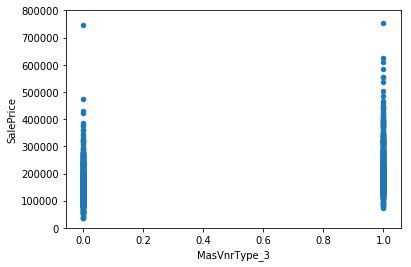

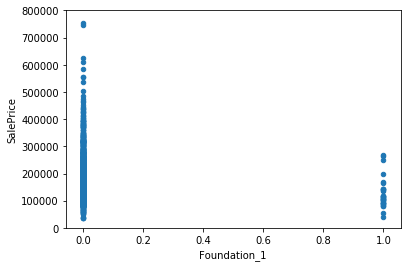

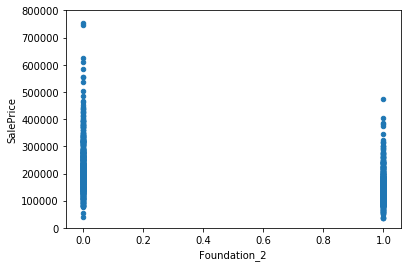

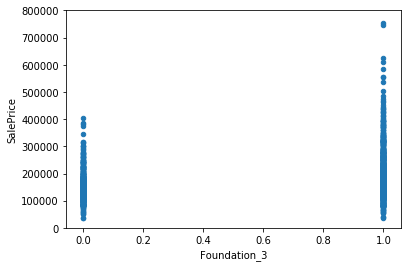

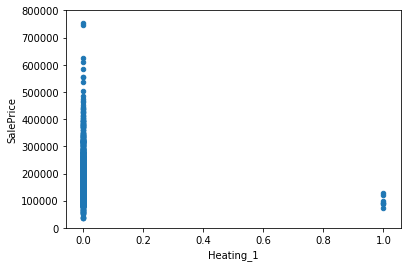

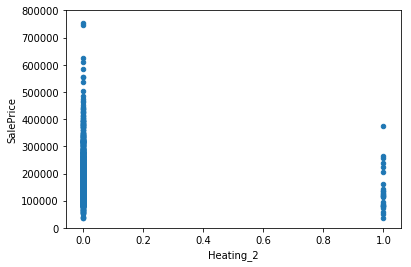

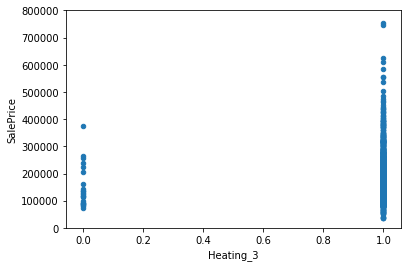

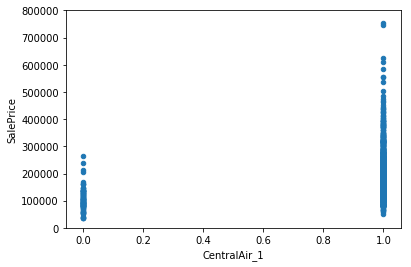

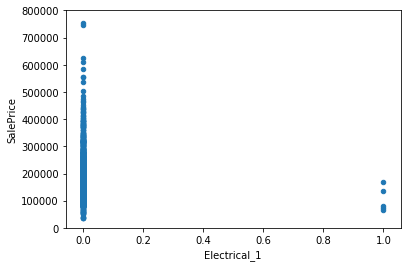

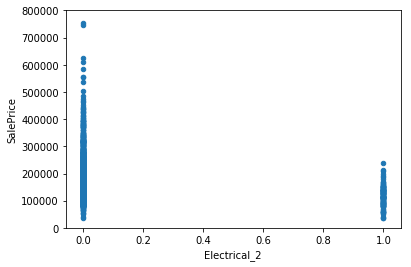

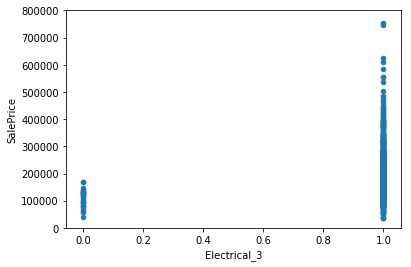

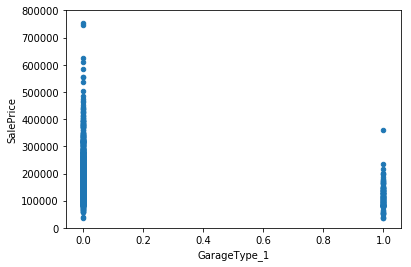

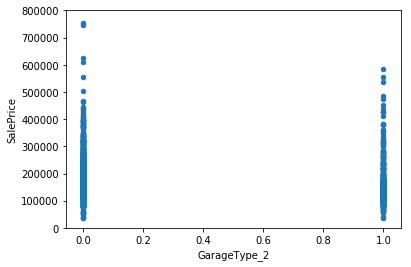

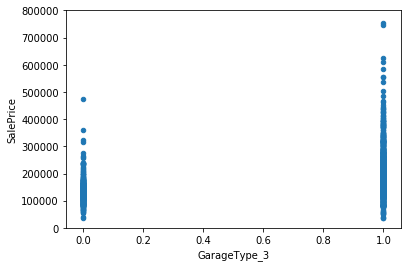

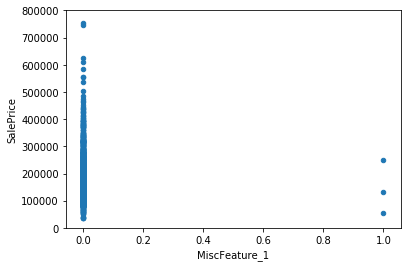

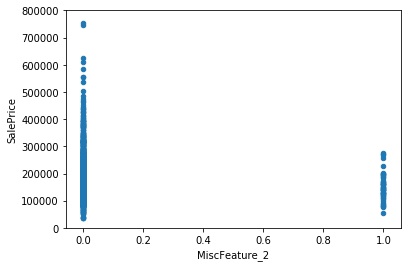

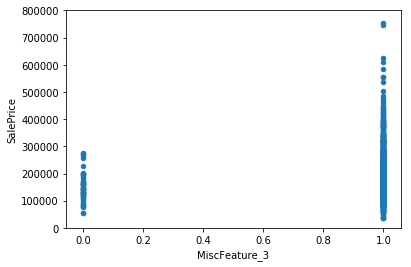

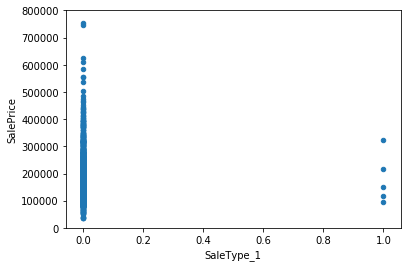

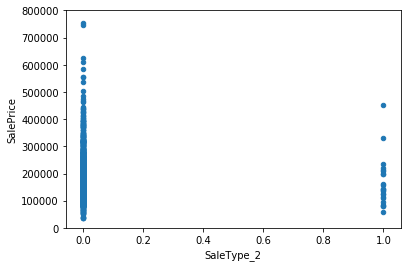

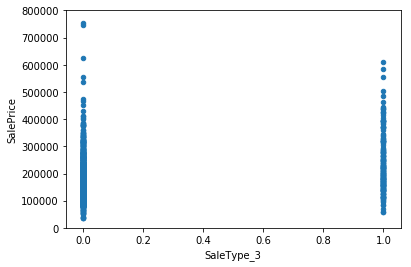

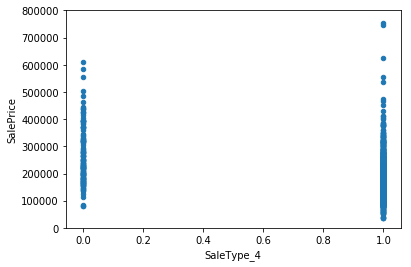

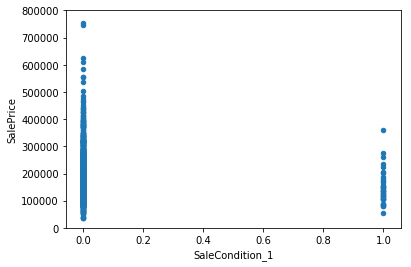

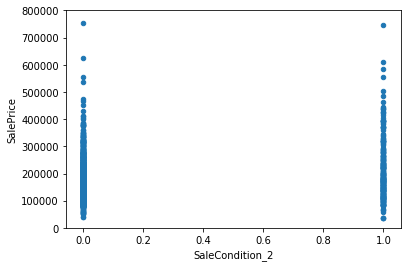

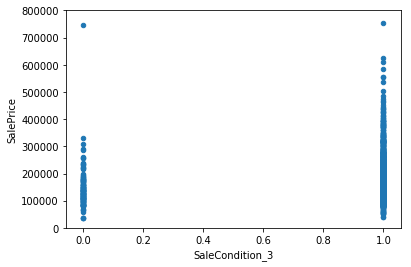

In [24]:
for continuesCol in conDF:
    tempCol = conDF[continuesCol]
    data = pd.concat([resultCol, tempCol], axis=1)
    data.plot.scatter(x=continuesCol, y='SalePrice', ylim=(0,800000));

# correlation matrix

<class 'pandas.core.frame.DataFrame'>
(129, 129)


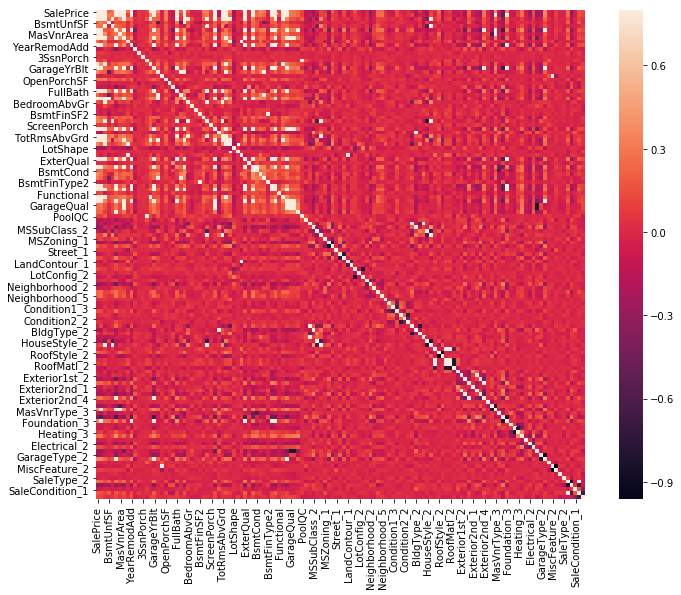

In [25]:

contAndResultDF = pd.concat([resultCol, conDF],axis=1)
corrmat = contAndResultDF.corr()
print(type(corrmat))
print(corrmat.shape)

corrmat1 = corrmat.copy()
corrmat1[corrmat1>0.4]=1
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, vmax=.8, square=True);

#### 'SalePrice' correlation matrix (zoomed heatmap style)

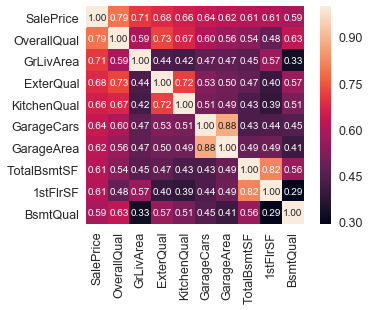

In [26]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(contAndResultDF[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()